<a href="https://colab.research.google.com/github/rich-hyun/machine_learning_military/blob/main/%EC%9D%BC%EC%B0%A8%EB%B3%84/day5_1_guess_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving project_proof2.xlsx to project_proof2 (32).xlsx
[[1. 2. 3. 4. 6. 9.]]
(49, 2)
0.07773308246135469
(49, 5)
0.1356880654977436
0.08324235460348839
0.2068209018225904


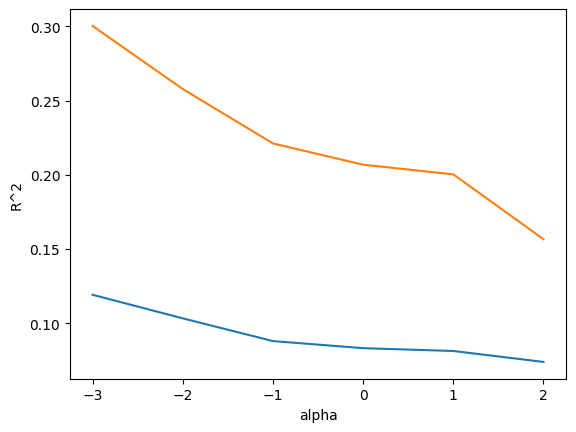

0.07397128172222911
0.15664764654352104
0.0
-0.02674575614725261


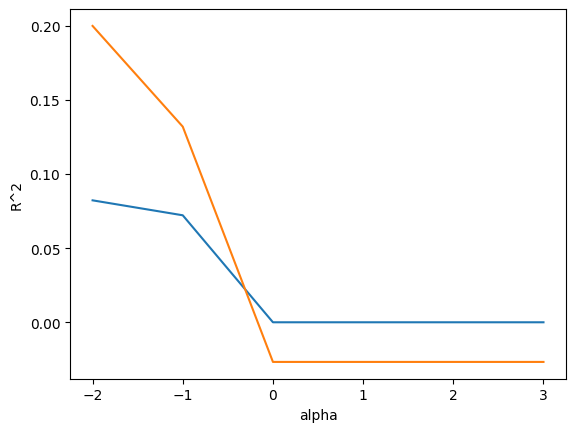

0.07218372334610779
0.13198568517083986


In [36]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
workbook=pd.read_excel('project_proof2.xlsx')
base=workbook.to_numpy()

import matplotlib.pyplot as plt
import numpy as np

"""넘파이로 데이터 준비하기"""
age=[]
for k in range(66):
  age.append(base[k][1])
rdays=[]
for k in range(66):
  rdays.append(base[k][3])

age2=np.array(age)
rdays2=np.array(rdays)
base_data=[[l,w] for l,w in zip(age,rdays)]
base_target=[1]*52+[0]*14

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(
    age2,rdays,stratify=base_target,random_state=42)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))


from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))


poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)


lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

#릿지 회귀
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

print(ridge.score(test_scaled,test_target))

import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

ridge=Ridge(alpha=100)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled, test_target))

train_score=[]
test_score=[]
alpha_list=[0.01,0.1,1,10,100,1000]
for alpha in alpha_list:
  lasso=Lasso(alpha=alpha,max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

lasso=Lasso(alpha=0.1)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled, test_target))